## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
mouse_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
mouse_results['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_id = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dupe_id

array(['g989'], dtype=object)

In [5]:
duplicate = mouse_results[mouse_results.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = mouse_results[mouse_results["Mouse ID"] == 'g989']
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#this df has just one entry for each mouse id, dropping duplicates by mouse ID gets rids of data at the different timepoints and regimen

clean_results_df = mouse_results.drop_duplicates(['Mouse ID','Timepoint'])
clean_results_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_results_df['Mouse ID'].nunique()


249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).mean()
tumor_median = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).median()
tumor_var = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).var()
tumor_std = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).std()
tumor_sem = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({'Mean Tumor Volume': tumor_mean
,'Median Tumor Volume' : tumor_median
,'Tumor Volume Variance' : tumor_var
,'Tumor Volume Standard Deviation' : tumor_std
,"Tumor Volume Standard Error" : tumor_sem
})

summary_table



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table2 = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).aggregate(['mean','median','var', 'std','sem'])
summary_table2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice Tested with each Drug')

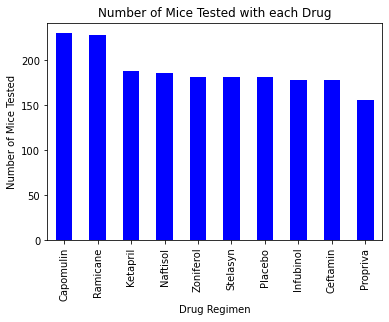

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_total = clean_results_df['Drug Regimen'].value_counts()

timepoints_total.plot.bar(color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Number of Mice Tested with each Drug')

In [12]:
type(timepoints_total)

pandas.core.series.Series

Text(0.5, 1.0, 'Number of Mice Tested with each Drug')

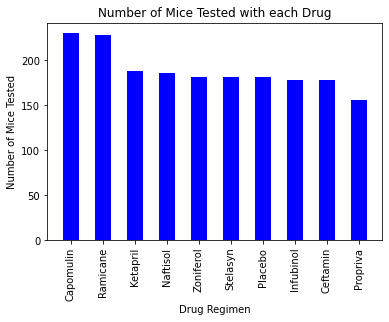

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_reg = timepoints_total.index
timepoints = timepoints_total

plt.bar(drug_reg,timepoints,color = 'blue', width = 0.5)
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Number of Mice Tested')
plt.title('Number of Mice Tested with each Drug')

Text(0.5, 1.0, 'Sex Ratio of Mice')

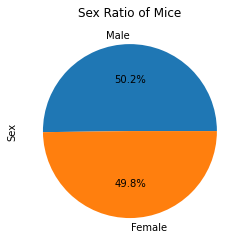

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
unique_mice = mouse_results.drop_duplicates(['Mouse ID'])
gender_count = unique_mice['Sex'].value_counts()

gender_count.plot.pie(autopct='%1.1f%%')
plt.title('Sex Ratio of Mice')

#i wasn't able to match the percentages on gitlab here

Text(0.5, 1.0, 'Sex Ratio of Mice')

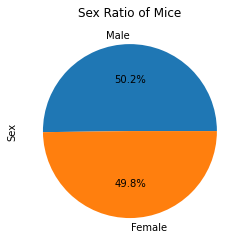

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count,autopct='%1.1f%%',labels=('Male','Female'))
plt.ylabel('Sex')
plt.title('Sex Ratio of Mice')

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_results_df.loc[clean_results_df['Drug Regimen'] == 'Capomulin']
ramicane_df = clean_results_df.loc[clean_results_df['Drug Regimen'] == 'Ramicane']
infubinol_df = clean_results_df.loc[clean_results_df['Drug Regimen'] == 'Infubinol']
ceftamin_df = clean_results_df.loc[clean_results_df['Drug Regimen'] == 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
capomulin_max = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_max = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_max_df = pd.merge(capomulin_max, clean_results_df, on=['Mouse ID','Timepoint']) #len25
ramicane_max_df = pd.merge(ramicane_max, clean_results_df, on=['Mouse ID','Timepoint']) #25
infubinol_max_df = pd.merge(infubinol_max, clean_results_df, on=['Mouse ID','Timepoint']) #25
ceftamin_max_df = pd.merge(ceftamin_max, clean_results_df, on=['Mouse ID','Timepoint']) #25

#creating a df with all the tumor volumes, .append works but will be outdated
regimen_tumor_max = pd.concat([
capomulin_max_df
,ramicane_max_df
,infubinol_max_df
,ceftamin_max_df]
,ignore_index=True)

regimen_tumor_max #len=100

#is there a more efficient way of doing this

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,0,45.000000,0,Ceftamin,Male,23,28
96,x581,45,64.634949,3,Ceftamin,Female,19,28
97,x822,45,61.386660,3,Ceftamin,Male,3,29
98,y769,45,68.594745,4,Ceftamin,Female,6,27


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =  ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
potential_outliers = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatments:
    regimen_df = regimen_tumor_max[regimen_tumor_max['Drug Regimen'] == regimen]

    quartiles = regimen_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f'Regimen: {regimen}')
    print(f"The lower quartile of tumor volumes is: {lowerq}")
    print(f"The upper quartile of tumor volumes is: {upperq}")
    print(f"The interquartile range of tumor volumes is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers. \n")

    if regimen_df.loc[(regimen_df['Tumor Volume (mm3)'] >= upper_bound) | (regimen_df['Tumor Volume (mm3)'] <= lower_bound)]:
        potential_outliers = potential_outliers + 1

    print(f'Number of outliers: {potential_outliers}')

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
    

Regimen: Capomulin
The lower quartile of tumor volumes is: 32.37735684
The upper quartile of tumor volumes is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers. 



ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Text(0.5, 1.0, 'Final Tumor Volumes')

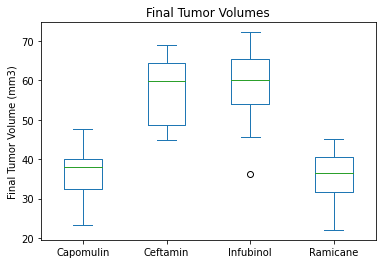

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimen_tumor_max.plot.box(column='Tumor Volume (mm3)', by='Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volumes')


In [19]:
capomulin_max_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume (mm3) of a Mouse treated with Capomulin (ID: b128)')

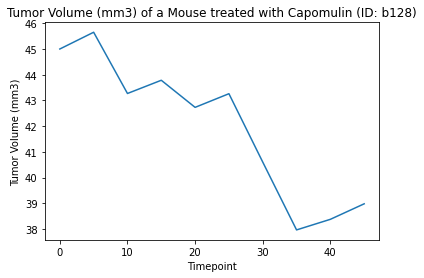

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_b128 = clean_results_df[clean_results_df['Mouse ID'] == 'b128']
plt.plot(mouse_b128['Timepoint'], mouse_b128['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume (mm3) of a Mouse treated with Capomulin (ID: b128)')


Text(0.5, 1.0, 'Average Tumor Volume (mm3) vs. Average Weight (g) of Mice Treated with Capomulin')

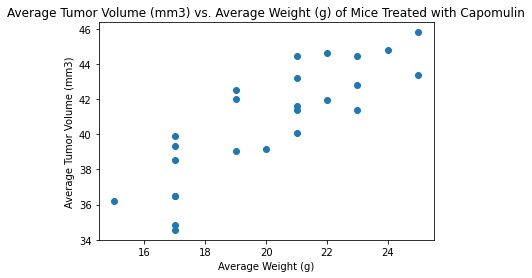

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = clean_results_df[clean_results_df['Drug Regimen'] == 'Capomulin']
avg_volumes = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weights = capomulin_mice.groupby('Mouse ID')['Weight (g)'].mean()
avg_volumes
avg_weights

plt.scatter(avg_weights, avg_volumes)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')
plt.title('Average Tumor Volume (mm3) vs. Average Weight (g) of Mice Treated with Capomulin')

## Correlation and Regression

The correlation coefficient has a value of 0.842
This suggests that there is a moderate correlation between average weight and tumor volume of mice treated with Capomulin.


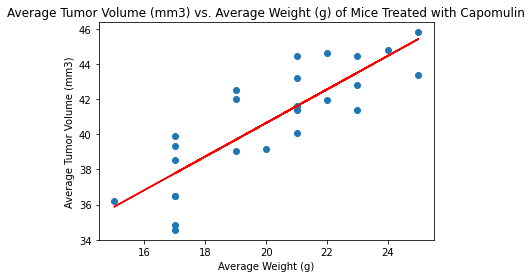

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#linear regression function
m_avg_tumor, int_avg_tumor, r_avg_tumor, p_avg_tumor, std_avg_tumor = st.linregress(avg_weights, avg_volumes)

#line equation
fit_avg_tumor = m_avg_tumor * avg_weights + int_avg_tumor 

#plotting again with line of best fit
plt.scatter(avg_weights, avg_volumes)
plt.plot(avg_weights, fit_avg_tumor, color = 'red')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')
plt.title('Average Tumor Volume (mm3) vs. Average Weight (g) of Mice Treated with Capomulin')

print(f'The correlation coefficient has a value of {r_avg_tumor.round(3)}')
print(f'This suggests that there is a moderate correlation between average weight and tumor volume of mice treated with Capomulin.')
